# Linear Regression with Test Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In this example, we will use the data in testdata.csv
to perform a basic linear regression analysis, and compare
the results to the quadratic and exponential fits from
the previous examples.

N.B.  In linear regression, there is a SINGLE y-value for each data point, but there
       may be MULTIPLE x-values, corresponding to the multiple factors that might affect the
       experiment, i.e. y = b_1 * x_1 + b_2 * x_2 + b_3 * x_3 + .....
       Therefore, the x data is a TWO DIMENSIONAL array ... the columns correspond to the different
      variables (x_1, x_2, x_3, ...), and the rows correspond to the values of those variables
       for each data point.


In [2]:
df = pd.read_csv("testdata.csv")
df['Pollen_Count'] = df['Pollen Count']
df.info()

y = df['Pollen Count']
X = df['Temperature']
dy = df['Error in Pollen Count']
dX = df['Error in Temperature']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            8 non-null      float64
 1   Pollen Count           8 non-null      float64
 2   Error in Temperature   8 non-null      float64
 3   Error in Pollen Count  8 non-null      float64
 4   Pollen_Count           8 non-null      float64
dtypes: float64(5)
memory usage: 452.0 bytes


In [3]:
df    # Show the data

,Temperature,Pollen Count,Error in Temperature,Error in Pollen Count,Pollen_Count
0,30.0,22.0,2.5,1.0,22.0
1,40.0,24.0,2.5,1.0,24.0
2,50.0,27.0,2.5,1.0,27.0
3,60.0,35.0,2.5,2.0,35.0
4,70.0,39.0,2.5,2.0,39.0
5,80.0,48.0,2.5,4.0,48.0
6,90.0,67.0,2.5,4.0,67.0
7,100.0,92.0,2.5,6.0,92.0


### Linear Regression Using Statsmodels

Step1: Create the model using the OLS function from the statsmodels.api module.

In [5]:
# Add a constant term to the linear fit
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
fit_model = 'OLS Linear' # For use in the plot legend

Step2: Print the model summary statistics

In [7]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Pollen Count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     36.70
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           0.000917
Time:                        09:44:21   Log-Likelihood:                -28.486
No. Observations:                   8   AIC:                             60.97
Df Residuals:                       6   BIC:                             61.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -15.4881     10.456     -1.481      

/Users/brash/anaconda3/envs/phys441/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Step3: Create the prediction

In [8]:
# Create prediction
y_pred = model.predict(X)

Step4: Plot the data and the fit

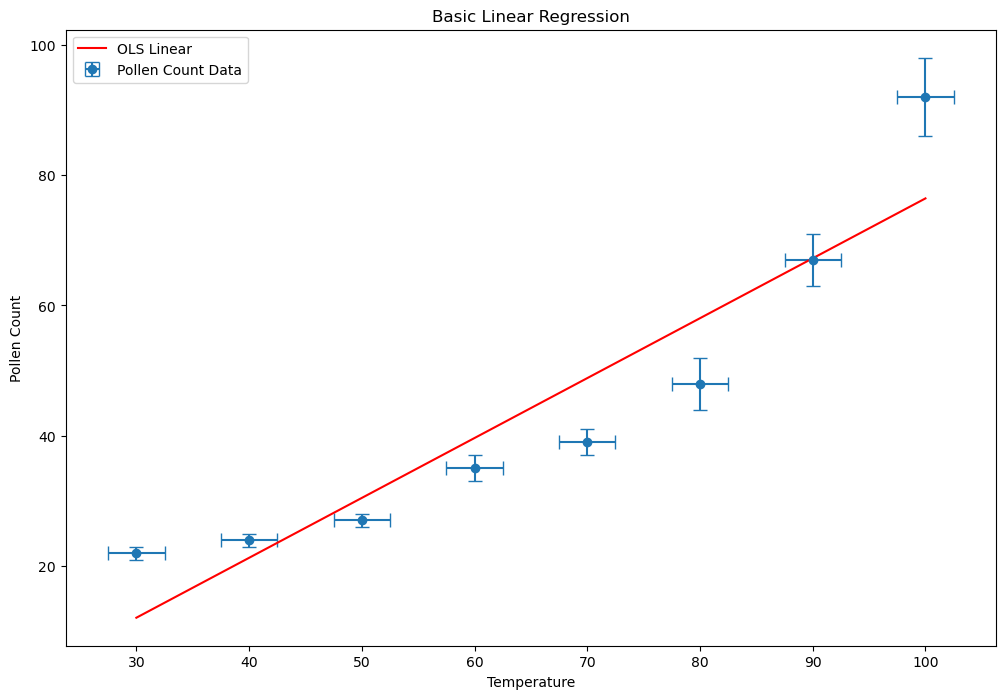

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.errorbar(df['Temperature'], y, yerr=df['Error in Pollen Count'],
                 xerr = df['Error in Temperature'], fmt='o', label='Pollen Count Data',
                 capsize=5.0)
plt.plot(df['Temperature'], y_pred, 'r-', label=fit_model)
plt.title("Basic Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Pollen Count")
plt.legend()
plt.show()

## Conclusion

Clearly, the linear fit is not a good fit to the data.  The data is clearly non-linear, and
a linear fit is not appropriate.

In the next section, we will fit a quadratic model to the data.

In [11]:
import statsmodels.formula.api as smf

In [12]:
model = smf.ols(formula='Pollen_Count ~ Temperature + I(Temperature**2)', data = df).fit()
fit_model = 'OLS Quadratic'

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Pollen_Count   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     155.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           3.17e-05
Time:                        09:47:29   Log-Likelihood:                -19.760
No. Observations:                   8   AIC:                             45.52
Df Residuals:                       5   BIC:                             45.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.2619    

/Users/brash/anaconda3/envs/phys441/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
y_pred = model.predict(df['Temperature'])


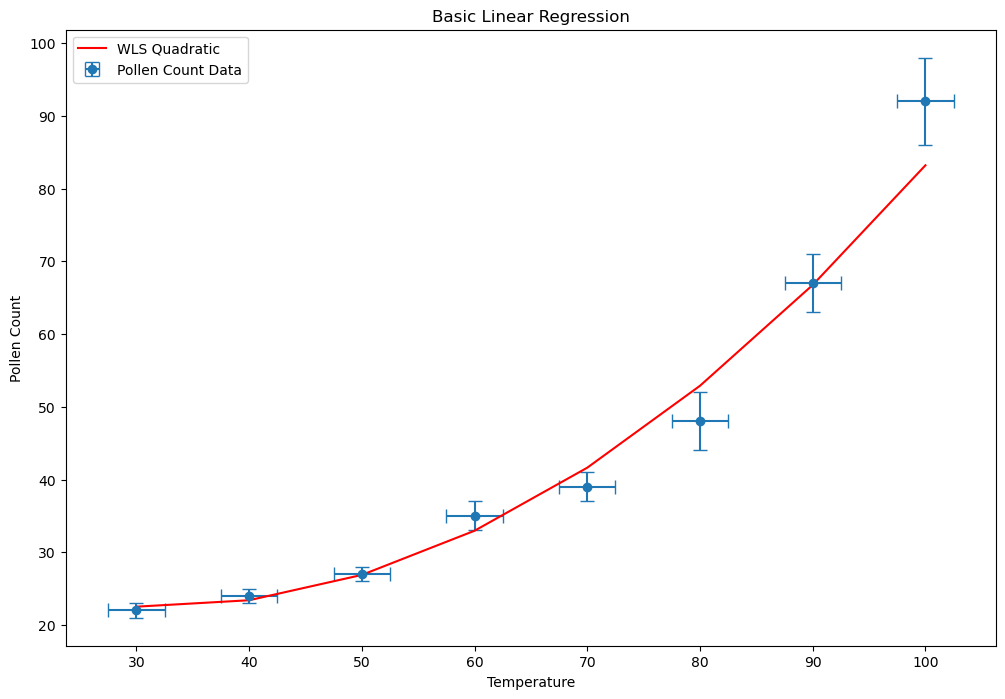

In [20]:
fig2 = plt.figure(figsize=(12, 8))
plt.errorbar(df['Temperature'], y, yerr=df['Error in Pollen Count'],
                xerr = df['Error in Temperature'], fmt='o', label='Pollen Count Data',
                capsize=5.0)
plt.plot(df['Temperature'], y_pred, 'r-', label=fit_model)
plt.title("Basic Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Pollen Count")
plt.legend()
plt.show()

## Conclusion

The quadratic fit is a much better fit to the data than the linear fit.  However, the quadratic
fit we have done here does NOT take into account the errors in the data.  In the next section, we
will create a WEIGHTED quadratic fit, which will take into account the errors in the data.

In [21]:
model = smf.wls(formula = 'Pollen_Count ~ Temperature + I(Temperature**2)',data = df,weights = 1/(dy**2)).fit()
fit_model = 'WLS Quadratic'

In [22]:
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:           Pollen_Count   R-squared:                       0.979
Model:                            WLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     114.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           6.73e-05
Time:                        09:51:44   Log-Likelihood:                -16.799
No. Observations:                   8   AIC:                             39.60
Df Residuals:                       5   BIC:                             39.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              35.4309    

/Users/brash/anaconda3/envs/phys441/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [18]:
y_pred = model.predict(df['Temperature'])

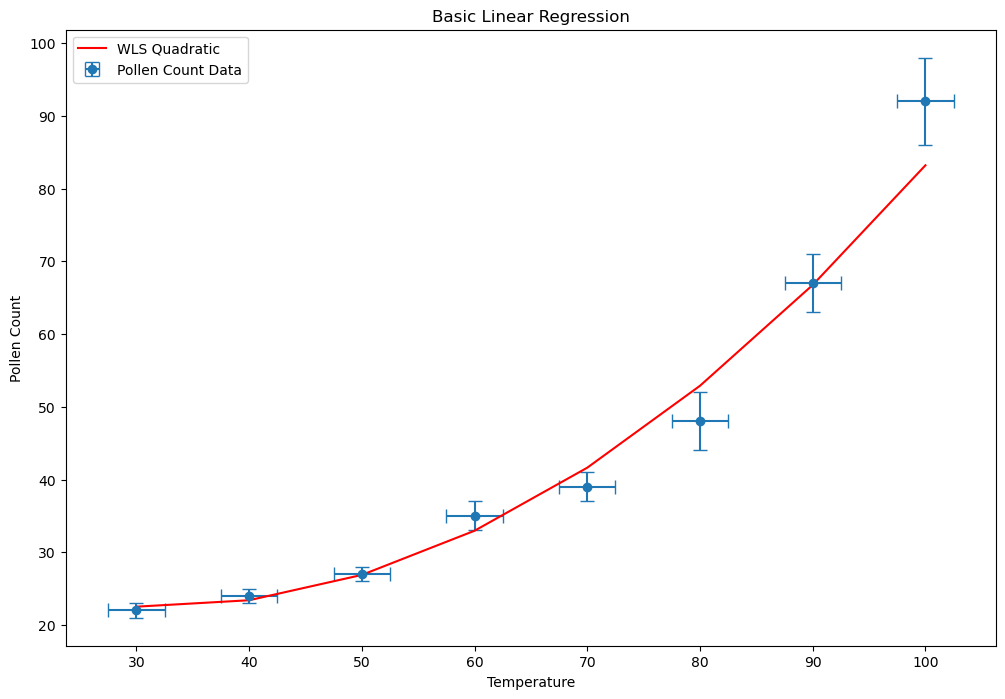

In [19]:
fig3 = plt.figure(figsize=(12, 8))
plt.errorbar(df['Temperature'], y, yerr=df['Error in Pollen Count'],
                 xerr = df['Error in Temperature'], fmt='o', label='Pollen Count Data',
                 capsize=5.0)
plt.plot(df['Temperature'], y_pred, 'r-', label=fit_model)
plt.title("Basic Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Pollen Count")
plt.legend()
plt.show()